# Pre-simulation Test Run

In [1]:
import community_connectivity

Welcome to the Community Connectivity Package!
This package facilitates multi-species dispersal models using Ocean Parcels and NEMO hydrodynamic data.
It allows you to set up, run, and analyze connectivity data for any marine species and region of your choice.
You can use the package in three different ways:
A. Interactive: Guided setup of the entire process. Recommended for first-time users.
B. Automatic: Run the entire process automatically using initial setup parameters.
C. Manual: Access individual functions to create a custom workflow.

Please select an option:


Dropdown(description='Mode:', options=(('Interactive Mode', 'community_connectivity.interactive'), ('Automatic…

Button(description='Submit', style=ButtonStyle())

Output()

In [3]:
!gcc --version

'gcc' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
from parcels import FieldSet, ParticleSet, JITParticle, AdvectionRK4
import numpy as np

# A simple test for ocean parcels
data = {'U': np.zeros((2, 2, 2)), 'V': np.zeros((2, 2, 2))}
dimensions = {'lon': np.linspace(0, 1, 2), 'lat': np.linspace(0, 1, 2), 'time': np.array([0, 1])}

fieldset = FieldSet.from_data(data, dimensions)

pset = ParticleSet.from_line(fieldset=fieldset, size=1, pclass=JITParticle, start=(0, 0), finish=(1, 1))
pset.execute(AdvectionRK4, runtime=1)
print("Parcels and compilers are set up correctly.")

RuntimeError: OSError during compilation. Please check if compiler exists: gcc

In [2]:
from community_connectivity.interactive import *
workflow_step(1)


Starting the interactive workflow...

Step 1: Select Hydrodynamic Data
This package uses hydrodynamic data from the Copernicus Marine Service.
Use the link below to set up a free account to browse and select your hydrodynamic data.
To access the data, you will need information such as your username, password, dataset ID number and longitude and latitude ranges of your study area.
This package requires the user to provide a species traits dataset with information on the planktonic larval duration and timing of spawning of each species.
This data will then be used to select the time range of the simulation and hydrodynamic data.
Please see Section X in the User Manual for more information.
https://data.marine.copernicus.eu/products


Found existing parameters. Do you want to reuse them? (yes/no):  yes


Reusing existing parameters:
dataset_id: cmems_mod_nws_phy_anfc_0.027deg-2D_PT1H-m
longitude_range: [-7.38, 3.1]
latitude_range: [48.92, 52.68]
time_range: [datetime.datetime(2023, 11, 1, 0, 0), datetime.datetime(2024, 8, 4, 0, 0)]
username: lbachmaier
password: Fjppxe37gx4q!
output_path: C:\Users\lbachmaier\Documents\Python Code\Prelim_models\CSV_Outputs\hydro.nc
export: False
traits: [{'species_name': 'Patella vulgata', 'spawning_start': '01/11/2023', 'spawning_end': '31/01/2024', 'min_PLD': 5, 'max_PLD': 8, 'average_PLD': 6, 'fecundity': 2}, {'species_name': 'Spirobranchus triqueter', 'spawning_start': '01/01/2024', 'spawning_end': '30/03/2024', 'min_PLD': 8, 'max_PLD': 12, 'average_PLD': 10, 'fecundity': 5}, {'species_name': 'Carcinus maenas', 'spawning_start': '01/04/2024', 'spawning_end': '30/06/2024', 'min_PLD': 25, 'max_PLD': 35, 'average_PLD': 30, 'fecundity': 6}]
species_traits_path: C:\Users\lbachmaier\Documents\Python Code\Prelim_models\CSV_Outputs\trait.csv
runtime: 277


Do you want to edit any parameters? (yes/no):  no


Fetching catalog: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:14<00:00,  4.93s/it]


Step 1 is completed. Run the following in the next cell to continue:
workflow_step(2)



Starting the interactive workflow...

Step 2: Download Species Occurrence Data
This package uses species occurrence data to determine species-specific release and settlement areas.
You have the option to download species occurrence data from the Global Biodiversity Information System (GBIF) using the species contained in the trait dataset uploaded in Step 1 or to provide your own species occurrence data.
Please visit the GBIF website for further information: https://www.gbif.org/ 
Please see Section X in the User Manual for more information.


Found existing parameters. Do you want to reuse them? (yes/no):  yes


Reusing existing parameters:
species_traits_path: C:\Users\lbachmaier\Documents\Python Code\Prelim_models\CSV_Outputs\trait.csv
geojson_file_path: C:\Users\lbachmaier\Documents\Python Code\Prelim_models\Python_Scripts\Functions\studyarea.geojson
save_csv: False
csv_file_path: None


Do you want to edit any parameters? (yes/no):  no


Using pre-existing GeoJSON file: C:\Users\lbachmaier\Documents\Python Code\Prelim_models\Python_Scripts\Functions\studyarea.geojson


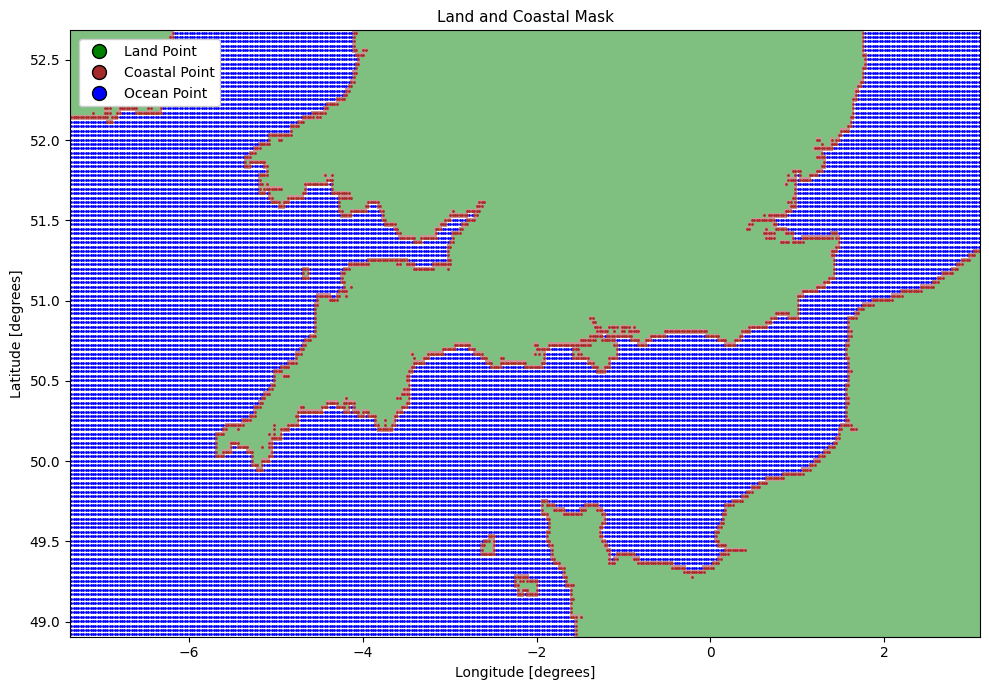

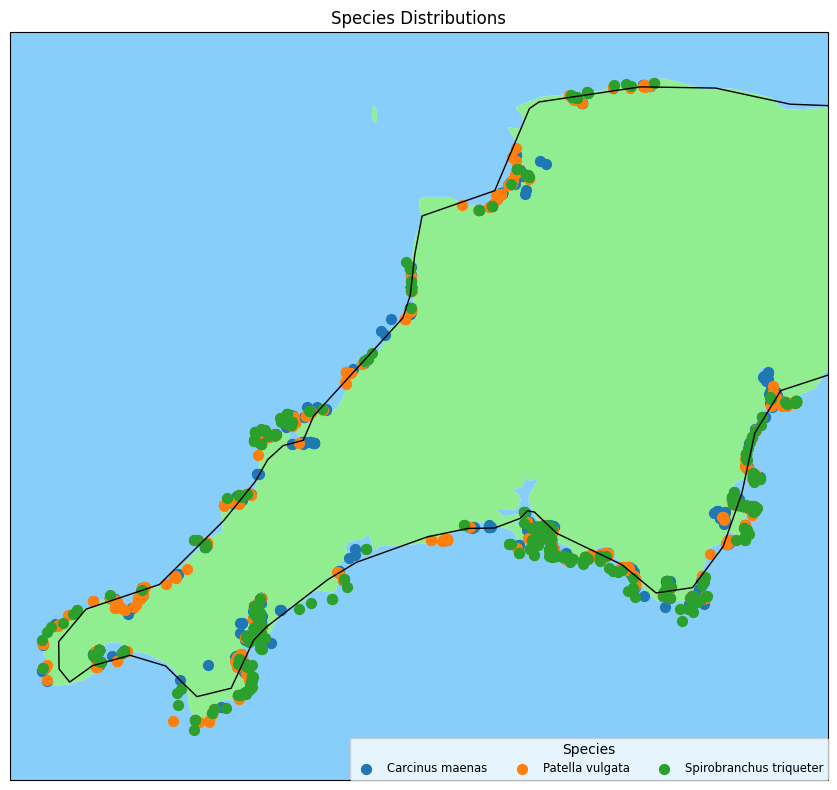

Step 2 is completed. Run the following in the next cell to continue:
workflow_step(3)


In [3]:
workflow_step(2)

In [4]:
workflow_step(3)


Starting the interactive workflow...

Step 3: Select a larval release and settlement strategy.
This package has the option to release larvae from all coastal sites or from known species-specific distributions.
Please see Section X in the User Manual for more information.
Choose particle release method:
a) Release particles from all coastal areas.
b) Release particles from species distributions (GBIF data).
c) Upload your own species distribution data.


Enter your choice (a, b, or c):  b


Option b selected: Releasing particles from species distributions (GBIF data).
Choose particle settlement method:
a) Settle at all coastal areas.
b) Settle based on species distributions (GBIF data).
c) Settle based on your own habitat suitability data.


Enter your choice (a, b, or c):  b


Option b selected: Settling particles based on species distributions (GBIF data).


Do you want to save the meshgrid data to a CSV file? (yes/no):  no
Do you want to save the release grid points to CSV files? (yes/no):  no
Do you want to save the settlement grid points to CSV files? (yes/no):  no


Release and settlement grid setup complete.
Step 3 is completed. Run the following in the next cell to continue:
workflow_step(4)


In [5]:
workflow_step(4)


Starting the interactive workflow...

Step 4: Create a ParticleSet for your community.
This package allows manual configuration of particles released per site, staggered or single release options, release frequency, and horizontal diffusivity.
Please see Section X in the User Manual for more information.


Enter the total number of particles to release per site (default is 10):  2
Enter 'staggered' for staggered release or 'single' for a single release:  staggered
Enter the release interval ('hourly', 'daily', 'weekly' or custom in days, e.g., '3' for 3-day interval, default is weekly):  weekly


Releasing 1 particles per site every 7 days, 0:00:00 for 40 intervals (total particles per site: 40).


Enter the constant horizontal diffusivity (kh) in m^2/s (default is 100):  


Step 4 is completed. Run the following in the next cell to continue:
workflow_step(5)


In [6]:
workflow_step(5)


Starting the interactive workflow...

Step 5: Execute the simulation.
Please see Section X in the User Manual for more information.


Enter the output path and file name to save the final simulation output:  C:\Users\lbachmaier\Documents\Python Code\Prelim_models\Raw_Output_Files\practicefull
Enter output frequency in hours:  168
Enter time step (dt) in minutes:  10080


Running the simulation...


RuntimeError: OSError during compilation. Please check if compiler exists: gcc

In [ ]:
workflow_step(6)